# Big Picture

The dataset that I will be using is the credit card fraud dataset. None of the data sets that I have worked with this year were particularly big and none performed particularly poorly so I decided to use a new dataset. There are a couple reasons why I think at Neural Net might be good for this data set. The first reason is that Neural Nets can learn and model non-linear complex relationships which we have with this data set. It also can generalize really well and therefore can model and predict on data that has been previously unseen. Finally, Neural Nets work well on high dimensional data and that is what we have with this dataset.

# Getting the Data

In [77]:
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot') # Have a nicer style of the plots

cc = pd.read_csv('creditcard.csv')

In [78]:
import os
size = os.path.getsize('creditcard.csv')
size

150828752

The file for the credit card data set is 150 MB

In [79]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

There are 31 columns in this dataset. One column is the class, this is 1 for fraud and 0 elsewhere. The time is the time between transactions in seconds. The amount is the amount for the transaction. The V1-V28 are the results of PCA on the other attributes. Because we have a dataset that has had PCA done on it, we are going to have data that is a little bit more linearly separable than it otherwise would have been. We have no missing values and all numeric attributes so we have data ready for machine learning.

In [80]:
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [81]:
cc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Looking at a snapshot of the data we can see that the V1-V28 categories are not going to make any sense to us so there is not really much we can learn from their break downs. 

# Large-Scale Visualization

There are 31 different attributes in this data set so visualizing that many feature plots would be too many plots. Many of those plots would be unneccessary so I want to cut down on the amount of features I am going to plot by first looking at any correlations in the data.

In [82]:
corr_matrix = cc.corr()
corr_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


In [83]:
corr_matrix["Class"].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001911F054390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000019119975908>]], dtype=object)

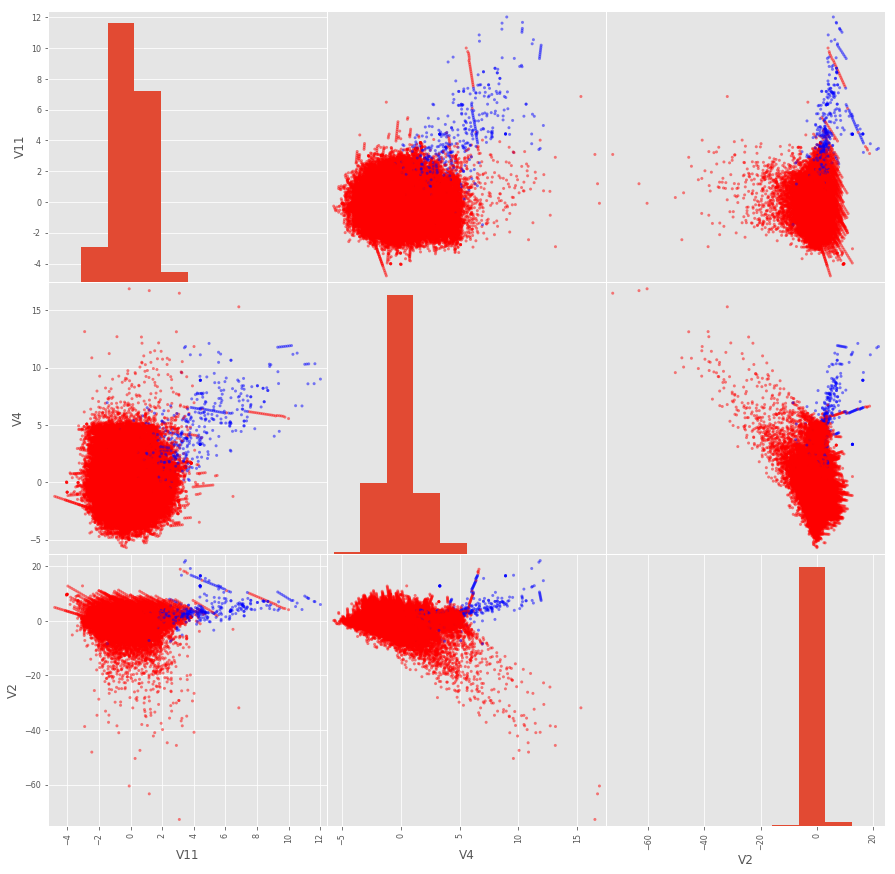

In [84]:
from pandas.plotting import scatter_matrix
clas = cc['Class']
color= ['red' if l == 0 else 'blue' for l in clas]
columns = ['V11', 'V4', 'V2']
data = pd.DataFrame(cc, columns=columns)
scatter_matrix(data,c=color,figsize=(15,15))

We have 31 different attributes to work with with this data set and a 31x31 scatter matrix would be overkill so I chose a couple of the attributes more correlated with the class attribute and plotted their relationships. Again, this data set has had a PCA done so the data is going to be more easily visualizable and as a result will look like it is more easily seperable. However, from the correlation matrix we can see that not many attributes are very strongly correlated with the class attibute.

# Doing a Basic Classifier for Comparison

In [85]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(cc)

x_train = train_set.drop(['Class'], axis=1)
y_train = train_set['Class']
x_test = test_set.drop(['Class'], axis=1)
y_test = test_set['Class']

I have not previously worked with this dataset so I want to quickly create a Random Forest classifier to evaluate the performance boosts of neural networks.

In [86]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=1)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [87]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfc, x_test, y_test, cv=3, scoring="accuracy")

array([ 0.99852538,  0.99873599,  0.99890448])

In [88]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(rfc, x_test, y_test, cv=3)

In [89]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred)

0.45086705202312138

In [90]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[71068,     4],
       [   91,    39]], dtype=int64)

In [91]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_test_pred)

0.64997185952273751

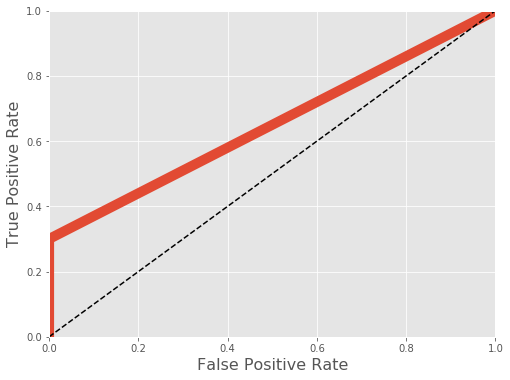

In [92]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=10, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

Now we have a basic classifier that doesnt really perform that well that we can compare to.

# Construction and Execution

In [93]:
import tensorflow as tf

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(x_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[900, 500], n_classes=2, feature_columns=feature_columns)
dnn_clf.fit(x=x_train,y=y_train, batch_size=100, steps=10000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000019117958EB8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\farka\\AppData\\Local\\Temp\\tmpwejhfhns'}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructio

INFO:tensorflow:global_step/sec: 123.586
INFO:tensorflow:loss = 0.0, step = 5201 (0.809 sec)
INFO:tensorflow:global_step/sec: 123.128
INFO:tensorflow:loss = 0.0, step = 5301 (0.813 sec)
INFO:tensorflow:global_step/sec: 124.124
INFO:tensorflow:loss = 0.0, step = 5401 (0.805 sec)
INFO:tensorflow:global_step/sec: 118.873
INFO:tensorflow:loss = 0.0, step = 5501 (0.840 sec)
INFO:tensorflow:global_step/sec: 122.223
INFO:tensorflow:loss = 0.0, step = 5601 (0.819 sec)
INFO:tensorflow:global_step/sec: 124.201
INFO:tensorflow:loss = 0.0, step = 5701 (0.805 sec)
INFO:tensorflow:global_step/sec: 122.524
INFO:tensorflow:loss = 0.0, step = 5801 (0.816 sec)
INFO:tensorflow:global_step/sec: 117.888
INFO:tensorflow:loss = 2.1081e-38, step = 5901 (0.848 sec)
INFO:tensorflow:global_step/sec: 118.308
INFO:tensorflow:loss = 0.0, step = 6001 (0.845 sec)
INFO:tensorflow:global_step/sec: 119.873
INFO:tensorflow:loss = 0.0, step = 6101 (0.833 sec)
INFO:tensorflow:global_step/sec: 122.976
INFO:tensorflow:loss =

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x000001911927E748>, 'hidden_units': [900, 500], 'feature_columns': (_RealValuedColumn(column_name='', dimension=30, default_value=None, dtype=tf.float64, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x00000191067259D8>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [94]:
from sklearn.metrics import accuracy_score
y_pred= list(dnn_clf.predict(x_test))
accuracy_score(y_test,y_pred)

Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from C:\Users\farka\AppData\Local\Temp\tmpwejhfhns\model.ckpt-10000


0.99720513468722793

In [95]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[70984,    88],
       [  111,    19]], dtype=int64)

# Fine-Tuning Neural Network

If I had the time I would run a grid search here but that would take up too much time. Instead I will say that the optimum number of hidden layers for this problem is probably around 1-2 layers as for many problems just 1-2 layers will be sufficient for reasonable results. For the number of neurons per hidden layer I would shaped the layers so that they funnel inward to a lower number of neurons. This problem has 900 input neurons and 2 output neurons so I would choose to gradually go from 900 to 2, say 500 and 200 neurons for hidden layer 1 and 2. Usually it is better to increase the number of layers rather than the neurons per layer. A simple approach would be to choose a model with more layers and neurons than needed an use early stopping to prevent overfitting. For the  activation function I would use the ReLU in the hidden layer because it is best in most cases and the softmax activation function for the output layer as it is generally a good choice for classification tasks.

# Presenting Solution

### Scalability

I think that the system that I have would be able to scale up to millions of data samples. Right now it works really fast on the file that I have and it is pretty big. Using a neural network the way that I have it set up should allow for the system to be scaled to a bigger data pool.

### Pitch

Credit card fraud is a fickle game and it has serious implications for the parties involved when fraud occurs. Having a model that can predict whether or not a transaction is fraudulent would benefit both credit card companies and owners of credit cards. My neural net will be able to take in credit card data learn from it and predict whether future transactions are fraudulent or not. 

### What did I learn

I learned that I really don't understand too much about Neural Networks and what I do know about them I cannot really apply to python applications. I learned that its probably not a good idea to start with a dataset that has had a PCA done to it already because its hard to work with that data and still be able to understand it.

# Plan for the Future of the System

### Outperform Simple Random Forest Classifier?

Not really. They both perform with the nearly the same accuracy which was already high in the case of the Random Forest so there is little room for improvement. The Neural Network is at least better at correctly identifying fraudulent purchases as the Random Forest classifier gets none of them correct, but this is because I chose to purposefully limit the RFC to max depth of 1. 

### Work Well For the Future?

Will this work well for the future? Absolutely not. I will never get the same data that I fed to this neural network. The data I got came from a PCA and I do not even know the original attributes of the data. It would be pretty much impossible collect transaction data and actually have it formatted correctly that the neural network would even accept it.

### Satisfied?

Not really. I think I have a basic understanding of neural networks and I understand the basics of the input layers, hidden layers and outputs layers and how they interact, but when it comes to actually creating one and actually fine tuning that model I am pretty lost. Hopefully in the future I will come back to neural networks and find out where I went wrong in this assignment.